In [6]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

tweets = pd.read_csv("../../data/Raw Data/R_Twitter_API/Crypto_Tweets_R_raw.csv")

In [7]:
tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,At #MetalPay we do not censor for thought crim...,False,176,NaN,2022-10-10 01:31:45,True,NaN,1579283512208654336,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",MarshallHayner,78,False,False,NaN,NaN
1,» Binance to Train Law Enforcement on How to S...,False,2930,NaN,2022-10-09 05:45:04,False,NaN,1578984871875448832,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",cz_binance,542,False,False,NaN,NaN
2,#Binance to help #Kazakhstan regulate its #cry...,False,281,NaN,2022-10-05 11:32:33,False,NaN,1577622767960264706,NaN,"<a href=""https://zapier.com/"" rel=""nofollow"">Z...",BTCTN,87,False,False,NaN,NaN
3,RT @lavern_spicer: I haven’t heard one single ...,False,0,NaN,2022-10-12 03:41:19,False,NaN,1580040893671051264,NaN,"<a href=""http://twitter.com/download/iphone"" r...",_Crypto_Colonel,779,True,False,NaN,NaN
4,RT @MarshallHayner: At #MetalPay we do not cen...,False,0,NaN,2022-10-12 03:35:42,False,NaN,1580039480592846850,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",jaketital,78,True,False,NaN,NaN


In [16]:
tweets.shape

(592, 1)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = []
for i  in range(len(tweets.columns)):
    corpus.append(' '.join(tweets.iloc[j,i] for j in range(len(tweets.iloc[:,i]))))

# INITIALIZE COUNT VECTORIZER
vectorizer=CountVectorizer()  

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
#print(type(Xs))

### EXPLORE THE OBJECT ATTRIBUTES 

# VOCABULARY DICTIONARY
#print("vocabulary = ",vectorizer.vocabulary_)   

# STOP WORDS 
#print("stop words =", vectorizer.stop_words)

# col_names
col_names=vectorizer.get_feature_names_out()
print("col_names=",col_names)

print("SPARSE MATRIX\n",Xs)

#CONVERT TO DENSE MATRIX
X=np.array(Xs.todense())
#print("CORPUS=",corpus)
#print("COLUMN NAMES=",col_names)
print("DOCUMENT WORD COUNTS")
print("SPARSE MATRIX\n",X) 

print("COLUMN NAMES=",col_names)
print("CORPUS WIDE WORD COUNTS:",np.sum(X,axis=0))
print("WORDS PER DOCUMENT:\n",np.sum(X,axis=1))

#CONVERT DOCUMENT TERM FREQUENCY TO ONE HOT ENCODED VECTORS
maxs=np.max(X,axis=0)
ONE_HOT_ENCODED=np.ceil(X/maxs)
print("MAX COUNT:",maxs)
print("ONE_HOT_ENCODED")
print(ONE_HOT_ENCODED)

col_names= ['000' '0gbgmdtd7w' '0o7c2uvoa0' ... 'zsdupl' 'zsduplo6xh' 'مهسا_امینی']
SPARSE MATRIX
   (0, 897)	1
  (0, 700)	1
  (0, 1301)	3
  (0, 1492)	1
  (0, 263)	4
  (0, 1401)	6
  (0, 694)	75
  (0, 374)	14
  (0, 335)	258
  (0, 346)	256
  (0, 1168)	2
  (0, 1077)	1
  (0, 195)	2
  (0, 965)	1
  (0, 973)	12
  (0, 944)	177
  (0, 905)	1
  (0, 808)	3
  (0, 672)	291
  (0, 294)	291
  (0, 31)	1
  (0, 501)	2
  (0, 1336)	161
  (0, 1286)	1
  (0, 1328)	53
  :	:
  (0, 1042)	1
  (0, 563)	1
  (0, 693)	1
  (0, 635)	1
  (0, 875)	1
  (0, 1461)	1
  (0, 239)	1
  (0, 370)	1
  (0, 37)	1
  (0, 28)	1
  (0, 509)	1
  (0, 617)	1
  (0, 1180)	1
  (0, 472)	1
  (0, 999)	1
  (0, 1376)	1
  (0, 800)	1
  (0, 714)	1
  (0, 906)	1
  (0, 569)	1
  (0, 917)	1
  (0, 1278)	1
  (0, 242)	1
  (0, 815)	1
  (0, 172)	1
DOCUMENT WORD COUNTS
SPARSE MATRIX
 [[1 1 1 ... 1 1 1]]
COLUMN NAMES= ['000' '0gbgmdtd7w' '0o7c2uvoa0' ... 'zsdupl' 'zsduplo6xh' 'مهسا_امینی']
CORPUS WIDE WORD COUNTS: [1 1 1 ... 1 1 1]
WORDS PER DOCUMENT:
 [7389]
MAX C

In [18]:
#------------------------
# #COMPUTE PAIRWISE DISTANCES BETWEEN DOCUMENTS 
#------------------------

print("--------------------------------------------")
#LOOP OVER ROWS (DOCUMENTS)
for i in range(0,X.shape[0]):
    # for j in range(i+1,len(X)):
    for j in range(i,X.shape[0]):
        print("DOC-i=",i,"DOC-j=",j); #print(X[i,:]); print(X[j,:])
        print("     CARTESIAN:",(np.sum((X[i,:]-X[j,:])**2.0)**0.5))

        #CARTESIAN DISTANCE
        CS=np.dot(X[i,:],X[j,:])/np.linalg.norm(X[i,:])/np.linalg.norm(X[j,:])
        print("     COSINE SIMILARITY:",CS)
        print("     COSINE DISTANCE:",1.0-CS)
print("--------------------------------------------")

--------------------------------------------
DOC-i= 0 DOC-j= 0
     CARTESIAN: 0.0
     COSINE SIMILARITY: 1.0
     COSINE DISTANCE: 0.0
--------------------------------------------


### Perplexity for Uni Gram Models

In [10]:
import re
from nltk.corpus import stopwords

additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)
tweets['Processed_Text'] = tweets['text'].str.lower().apply(lambda x: re.sub(r"(?:\@|https?\://)\S+", "", x))

tweets_clean = tweets['Processed_Text'].values

X = tweets_clean[0:500]
x_test = tweets_clean[500:592]

from nltk import word_tokenize
from nltk import sent_tokenize

tokenized_text = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(".".join(X))]
tokenized_test = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(".".join(x_test))]

In [3]:
from nltk.lm import MLE

ngram = 1
train, vocab = nltk.lm.preprocessing.padded_everygram_pipeline(ngram, tokenized_text)
test,_ = nltk.lm.preprocessing.padded_everygram_pipeline(ngram, tokenized_test)

model = nltk.lm.models.KneserNeyInterpolated(ngram)
model.fit(train, vocab)

ave = 0
count = 0
for t,s in zip(test, x_test):
    perplexity = model.perplexity(t)
    ave = ave + perplexity
    count += 1
ave = ave/count
print(ave)

ZeroDivisionError: division by zero

In [11]:
import re
from nltk.corpus import stopwords

additional  = ['rt','rts','retweet', '.rt', '#', '»']
swords = set().union(stopwords.words('english'),additional)

tweets_clean = pd.DataFrame()

from nltk import word_tokenize
from nltk import sent_tokenize
tweets_clean['Tokenized_Text'] = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(".".join(tweets['Processed_Text']))]

def remove_stopwords(text):
    text = [word for word in text if word not in swords]
    return text

tweets_clean['Tweets_Clean'] = tweets_clean['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
tweets_clean.head(10)

#nltk.download('wordnet')
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweets_clean['Tweet_Lemmatized'] = tweets_clean['Tweets_Clean'].apply(lambda x: lemmatizer(x))
tweets_clean.head()

tweets_clean.to_csv("../../data/Clean Data/Clean_TokeLemm_Crypto_Tweets.csv")

### Sentiment Intensity Analyzer from Vader

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
tweets['rating'] = tweets['Processed_Text'].apply(analyzer.polarity_scores)

def just_compound(x):
    return x['compound']

tweets['rating'] = tweets['rating'].apply(lambda x: just_compound(x))

tweets

avg_sentiment = tweets['rating'].mean()
avg_sentiment


-0.15169222972972934

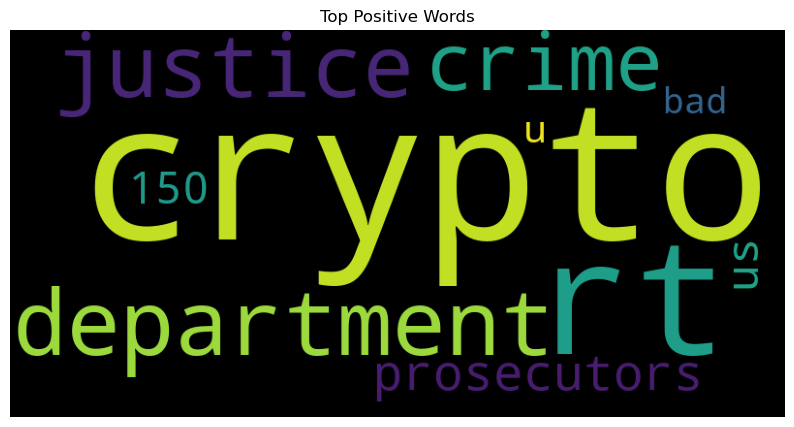

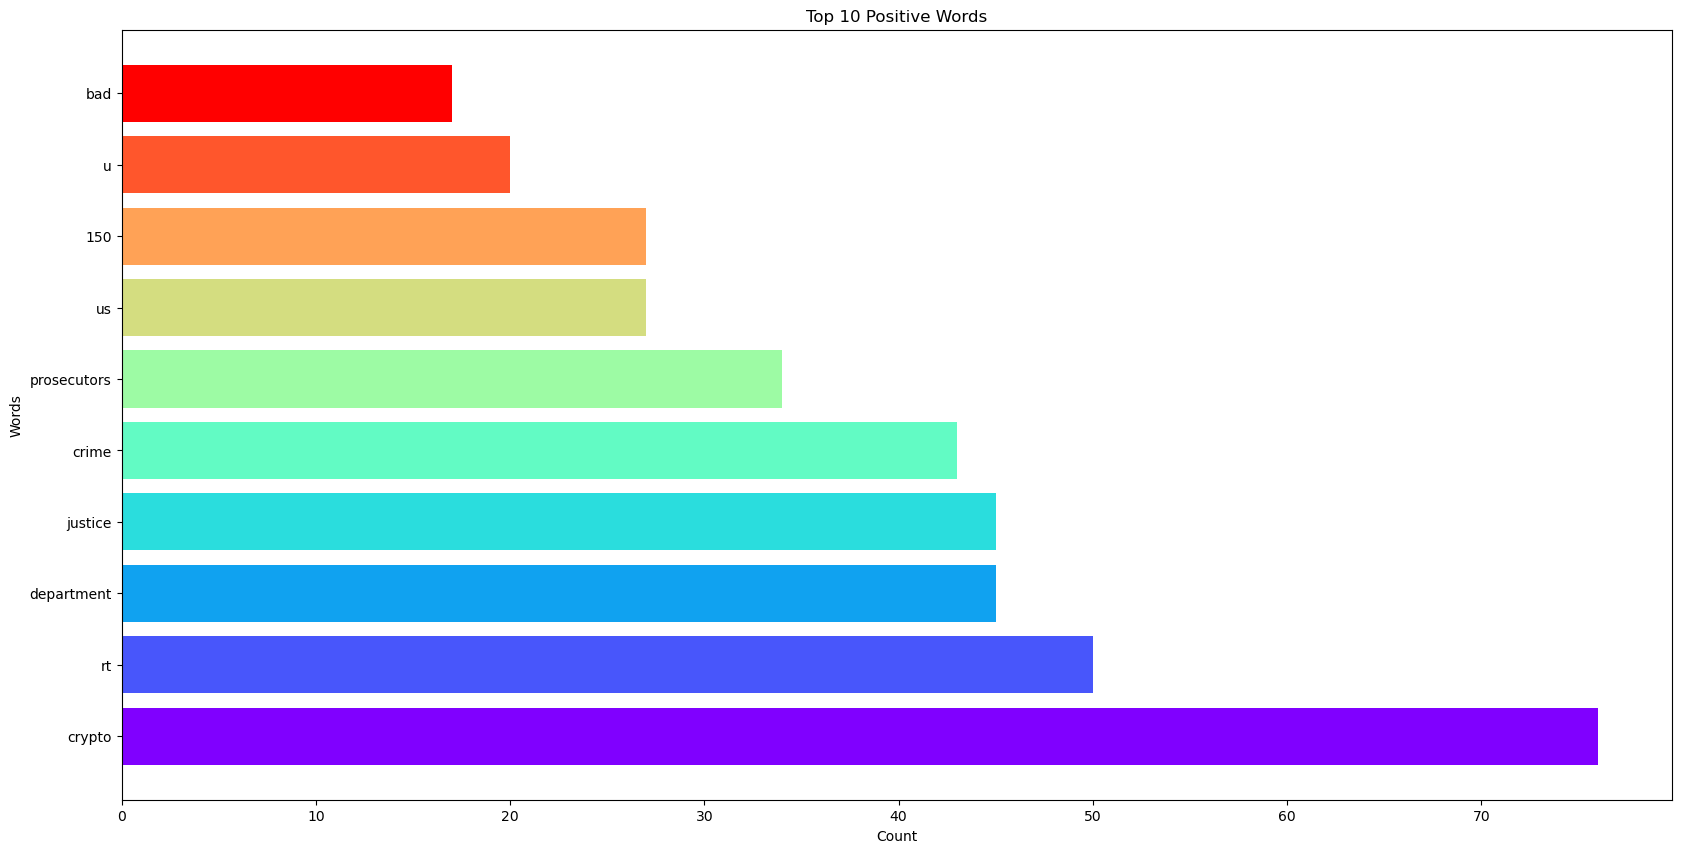

In [13]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

stopwords = stop_words

def makeWordCloud(freqs, title):
    rcParams['figure.figsize'] = 10, 20
    wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=25, width=800, height=400).generate_from_frequencies(freqs)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
def makeFreqBarChart(freqs, title):
    words = list(freqs.keys())
    counts = list(freqs.values())
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

just_pos = tweets[tweets['rating'] > 0]
just_neg = tweets[tweets['rating'] < 0]

pos_lines = list(just_pos['Processed_Text'])

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

word_freq = dict(pos_freq.most_common(10))

makeWordCloud(word_freq, "Top Positive Words")
makeFreqBarChart(word_freq, "Top 10 Positive Words")

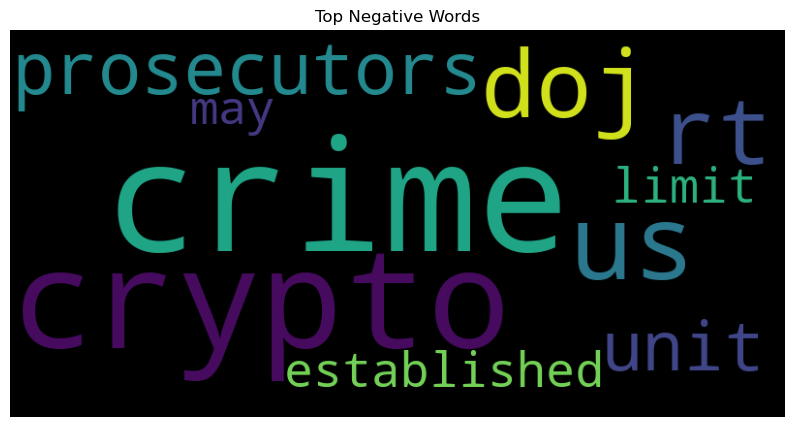

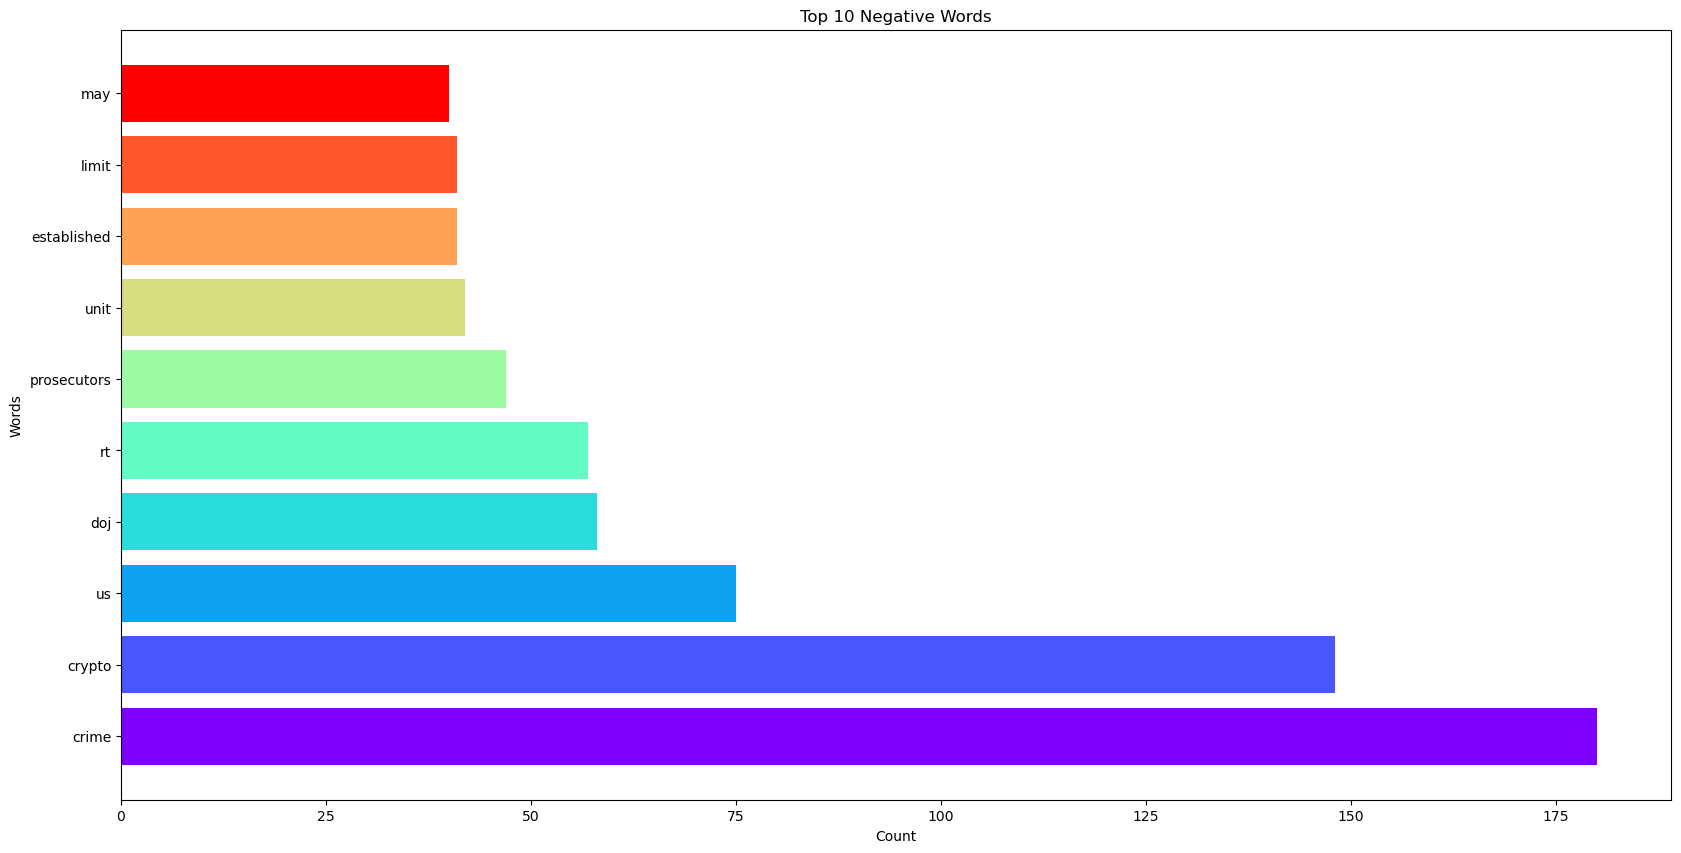

In [ ]:
pos_lines = list(just_neg['Processed_Text'])

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

word_freq = dict(pos_freq.most_common(10))

makeWordCloud(word_freq, "Top Negative Words")
makeFreqBarChart(word_freq, "Top 10 Negative Words")